## Sample script of LWA
### To run the local wave activity code with idealized wave perturbations

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from tracer_eq_1var_2d_local4 import *

OMEGA  = 7.292e-5
zeta_eddy = 5e-6  # magnitude of idealized perturbations

### Idealized wave perturbations

In [2]:
# longitude and latitude edges
lonb = np.arange(0, 360.1, 2.5)
latb = np.arange(-90, 90.1, 2.5)

# longitude and latitude centers
lon = 0.5 * (lonb[:-1] + lonb[1:])
lat = 0.5 * (latb[:-1] + latb[1:])

ni = len(lon)
nj = len(lat)

cos_lat = np.cos(lat * np.pi / 180.)
sin_lat = np.sin(lat * np.pi / 180.)

vor_eddy = np.zeros((ni, nj))
vor_mean = np.zeros((ni, nj))
vor = np.zeros((ni, nj))

for j in range(nj):
    yy = (lat[j] - 45.) / 15.
    vor_eddy[:, j] = zeta_eddy * cos_lat[j] * np.exp(-yy * yy) * np.cos(5 * lon * np.pi / 180.)
    vor_mean[:, j] = 2 * OMEGA * sin_lat[j]

vor = vor_mean + vor_eddy

qz, Qe, Ae, dQedY, AeL, AeLp, AeLm = tracer_eq_1var_2d_local4(lon, lat, lonb, latb, vor, sort_direct='ascend')

### Visualization

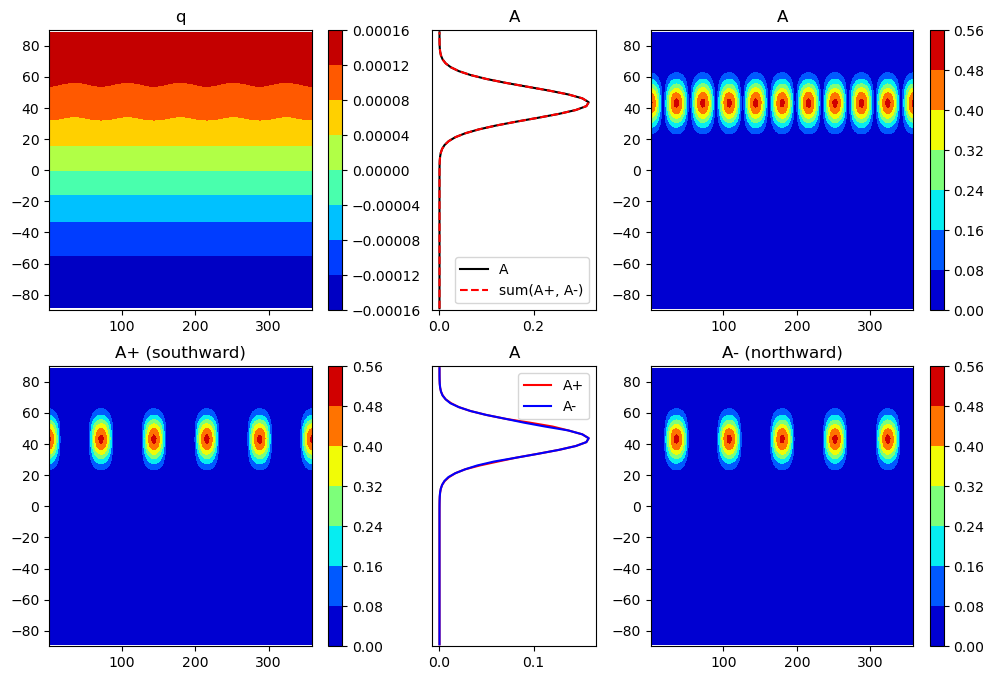

In [3]:
fig = plt.figure(figsize=(12, 8))
plt.set_cmap('jet')
gs = GridSpec(2, 3, height_ratios=[1, 1], width_ratios=[2, 1, 2])

plt.subplot(gs[0, 0])
plt.contourf(lon, lat, vor.T)
plt.ylim([-90, 90])
plt.colorbar()
plt.title('q')

plt.subplot(gs[0, 1])
plt.plot(Ae, lat, '-k', label='A')
plt.plot(np.mean(AeL, axis=0), lat, '--r', label='sum(A+, A-)')
plt.legend()
plt.ylim([-90, 90])
plt.yticks([])
plt.title('A')

plt.subplot(gs[0, 2])
plt.contourf(lon, lat, AeL.T)
plt.colorbar()
plt.ylim([-90, 90])
plt.title('A')

plt.subplot(gs[1, 0])
plt.contourf(lon, lat, AeLp.T)
plt.colorbar()
plt.ylim([-90, 90])
plt.title('A+ (southward)')

plt.subplot(gs[1, 1])
plt.plot(np.mean(AeLp, axis=0), lat, '-r', label='A+')
plt.plot(np.mean(AeLm, axis=0), lat, '-b', label='A-')
plt.legend()
plt.ylim([-90, 90])
plt.yticks([])
plt.title('A')

plt.subplot(gs[1, 2])
plt.contourf(lon, lat, AeLm.T)
plt.colorbar()
plt.ylim([-90, 90])
plt.title('A- (northward)')

plt.show()